**GOAL**: check if we can build a sparse basis using seaweeds

- Build graph
- Remove some factors to expose leaves
- Build seaweeds and add them to a basis until they form a complete set
- Keep track of the maximum hamming weight within the basis

In [54]:
include("../code/headers.jl")
include("../code/slim_graphs.jl")
include("../code/seaweed.jl")
using OffsetArrays

To check whether $v\in span\{\mathcal{B}\}$ where $\mathcal{B}=\{v_1,...,v_k\}$, write the system $B\lambda=v$ and use gaussian elimination. If the system can be put in row echelon form, then the vector lies in the span

In [55]:
m = factorial(5)*11
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
@show n
Λ = [0,1-r,r]
K = [0,0,1]
nedges = 3m
lambda,rho = nodes2edges(Λ,K)
b = round(Int, 5*sqrt(n))

n = 1800


212

In [56]:
nsw = n
fg = ldpc_graphGF2(n,m,nedges,lambda,rho, accept_multiedges=false)
ff = breduction!(fg, b)
# use gaussian elim to get size of nullspace
H, dep = gfrrefGF2!(copy(fg.H))
dim = fg.n - length(dep)

692

In [57]:
Baux = sparse(falses(fg.n, dim))
B, niters = seaweed_basis(nsw, fg, dim, Baux)

Progress: 100%|█████████████████████████████████████████| Time: 0:01:26


(
⠷⣮⠌⢉⠅⡺⣶⣼⠾⣗⠦⡷⠽⣽⣭⣗⢬⣦⢦⠆
⣘⣮⣷⣞⠗⡞⠷⢶⢼⣳⣶⡧⠵⢷⢽⣗⡺⠟⠱⡆
⣺⡳⡓⢏⣷⣛⣾⣨⣺⡞⣻⣞⣖⣜⣜⣞⣳⣩⢛⠄
⡉⢬⢽⡕⣴⠿⣾⢹⡹⢹⣅⣃⢽⢽⣴⡧⢐⣎⢸⠇
⢏⡻⣭⢾⠯⣯⣻⣿⡽⢄⣨⢿⣼⡯⣍⢇⢿⠇⠩⠄
⣿⣛⣞⡌⢷⣻⣻⣻⡻⣟⡏⣿⣗⣷⣞⣾⣸⡭⢜⠁
⢺⣿⢻⣿⣏⢗⠕⣫⡿⣿⢷⢿⣨⡏⣺⠕⢩⠥⢇⡅
⠘⡿⣝⡿⣟⡛⡿⢚⣾⡻⡯⣿⡘⡟⡿⡟⣺⣮⠾⠂
⠚⣌⣯⢖⣝⣚⠳⡞⡮⠫⣿⣼⣷⣋⡱⡗⡮⣬⢞⡁
⢻⣿⠿⡳⣻⣿⣷⣾⢿⢺⣛⣗⢻⣿⡓⡔⠔⠖⣸⠁
⣚⣯⣟⡓⡥⣳⣯⣹⣯⣫⣮⣿⣏⣋⣷⠪⢓⣝⣯⡅
⣀⣆⡫⡈⢓⢇⡽⣿⢟⠍⢯⣎⡻⡿⠿⣿⣉⡷⢲⠇
⠸⠜⡊⢶⡋⣷⣥⣷⡟⣻⣏⠗⣫⣿⡗⣽⡯⠦⣎⡁
⢰⡊⣯⣏⠧⣇⢼⡯⡓⣷⣻⡯⣾⣛⣞⠬⢯⡧⡙⡃
⡼⠠⣻⣯⡋⣷⣿⠻⡮⢿⣛⣿⠷⢱⣭⣟⢸⣔⠷⠄
⠭⡻⡝⣽⣭⣽⠻⣵⢬⣥⣲⡿⡻⣽⢵⢴⣻⣷⡯⠅
⣡⣡⣏⣷⣧⣎⡳⣿⡗⣻⡴⣿⡮⣻⣷⣕⠆⢿⠓⡆
⣴⡗⢯⣼⣶⡗⣯⢫⢟⡾⣴⡮⣷⣏⣿⣣⠿⠭⡛⡆
⡯⣧⣵⣏⡯⣫⠖⠷⢿⢾⣮⡻⣺⡿⣥⣾⣴⣣⣏⠆
⢾⡖⣢⣾⣿⣯⡵⣌⢷⢯⣿⡮⣺⡾⡐⣦⢓⡿⣿⠁
⣝⣍⡞⣶⣴⣾⣾⣴⠽⣵⣽⣿⢱⢿⡍⡯⢷⣻⣿⡇
⢺⣟⣿⡟⡟⡓⣿⣛⣞⢿⣷⣿⢼⣻⣫⡿⢏⣱⣺⡄
⢓⡿⣏⡸⡳⣿⣿⢺⢇⢪⣯⣻⢫⣿⣿⣿⣺⢅⣽⡇
⡽⣝⣭⣷⡿⣝⡷⣟⣹⣿⡽⢿⢭⣺⣽⢎⡝⡃⣹⡇
⣿⡺⡽⡿⣯⣿⣿⣹⣿⣗⣿⣟⢿⣾⣻⣗⡡⡧⡙⡆
⠿⢿⡃⡾⡶⣿⢷⣾⢼⡱⡿⣿⣿⣻⣷⠟⣽⣭⢝⡇, 1798)

In [58]:
A,dep = gfrrefGF2(B)
dropzeros!(A)
length(dep), size(B)

(692, (1800, 692))

In [59]:
@assert iszero(fg.H*B .% 2)

In [60]:
hamm = sum(B,dims=1)

1×692 Matrix{Int64}:
 16  6  13  15  5  4  16  6  5  2  2  5  …  14  3  10  14  8  7  4  8  13  11

In [61]:
maximum(hamm)

42

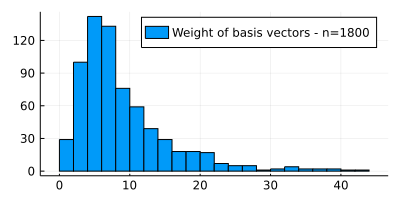

In [62]:
histogram(vec(hamm), size=(400,200), label="Weight of basis vectors - n=$n")

In [63]:
println("Number of removed factors: ", b)

Number of removed factors: 212


## Vary the number of removed checks

In [38]:
m = factorial(5)*11
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
@show n
Λ = [0,1-r,r]
K = [0,0,1]
nedges = 3m
lambda,rho = nodes2edges(Λ,K)
bb = round.(Int, (4:2:8)*sqrt(n))
nsw = n
hws = Vector{Int}[]
bb

n = 1800


3-element Vector{Int64}:
 170
 255
 339

In [39]:
fg1 = ldpc_graphGF2(n,m,nedges,lambda,rho, accept_multiedges=false)
for (i,b) in enumerate(bb)
    println("### b=$b - $i of ", length(bb))
    fg = deepcopy(fg1)
    ff = breduction!(fg, b)
    # use gaussian elim to get size of nullspace
    H, dep = gfrrefGF2!(Array(fg.H))
    dim = fg.n - length(dep)
    B, niters = seaweed_basis(nsw, fg, dim)
    push!(hws, vec(sum(B,dims=1)))
end

### b=170 - 1 of 3


Progress: 100%|█████████████████████████████████████████| Time: 0:20:38


### b=255 - 2 of 3


Progress: 100%|█████████████████████████████████████████| Time: 0:09:28


### b=339 - 3 of 3


Progress: 100%|█████████████████████████████████████████| Time: 0:08:25


n=1800


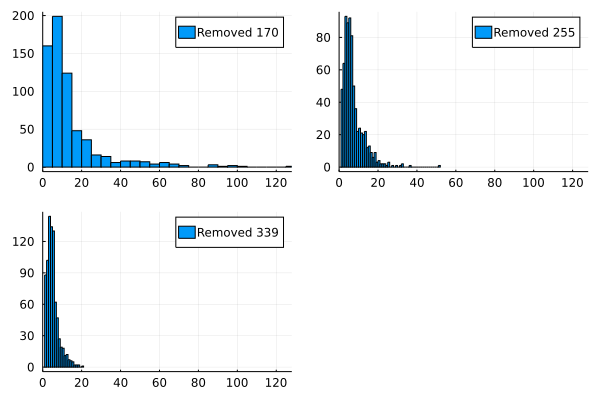

In [40]:
hs = Vector{Plots.Plot{Plots.GRBackend}}(undef,length(bb))
max_hw = maximum(maximum.(hws))
for (i,b) in enumerate(bb)
    h = histogram(hws[i], label="Removed $b")
    xlims!((0,max_hw+1))
    hs[i] = h
end
println("n=",n)
plot(hs..., layout=length(bb))